In [1]:
import pathlib
import sys
import random
import numpy as np
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets,transforms
from torch.utils.data import DataLoader
from torch.utils.data import random_split


In [2]:
# define constants
IMAGE_SIZE=32
CHANNELS=1
STEP_SIZE=10
STEPS=60
NOISE=0.005
ALPHA=0.1
GRADIENT_CLIP=0.03
BATCH_SIZE=128
BUFFER_SIZE=8192
LEARNING_RATE = 1e-4
EPOCHS=60

In [3]:
sys.path.append(r"C:\Users\amrul\programming\deep_learning\dl_projects\Generative_Deep_Learning_2nd_Edition")

In [4]:
from notebooks.utils import display

In [5]:
from ebm_pytorch import EnergyFunction, generate_samples

model = EnergyFunction(out_size=2, out_channels=64)

In [6]:
model_weights_folder= pathlib.Path(r"C:\Users\amrul\programming\deep_learning\dl_projects\Generative_Deep_Learning_2nd_Edition\notebooks\07_ebm\01_ebm\models")
ebm_weights_path = model_weights_folder/"ebm_last_epoch_pytorch_weights.pt"
ebm_state_dict = torch.load(str(ebm_weights_path))
model.load_state_dict(ebm_state_dict)

<All keys matched successfully>

In [7]:
num_img=10

start_imgs = torch.rand(num_img, CHANNELS, IMAGE_SIZE, IMAGE_SIZE) * 2 - 1

In [8]:
gen_images,escores = generate_samples(model,start_imgs,STEPS,STEP_SIZE,NOISE,torch.device('cpu'),return_imgs_per_step=True)

In [9]:
print(gen_images.shape)
gen_images = gen_images.detach()

torch.Size([60, 10, 1, 32, 32])


I will show first 20 rounds
scores at step 1 : tensor([[-23.5705],
        [-23.7034],
        [-23.8596],
        [-23.6882],
        [-23.9392],
        [-23.8544],
        [-23.6574],
        [-23.8323],
        [-24.1846],
        [-23.8184]])


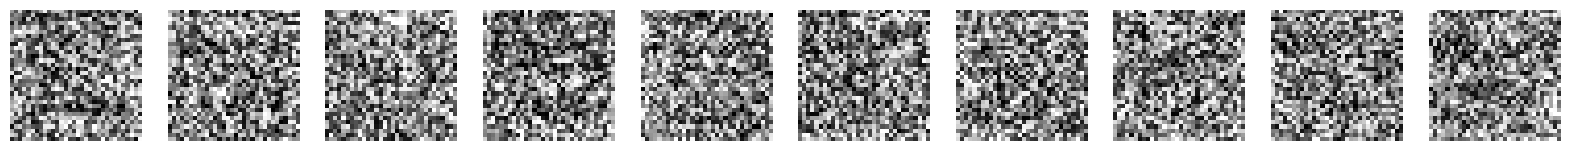

scores at step 2 : tensor([[-22.4561],
        [-22.5833],
        [-22.7543],
        [-22.4909],
        [-22.8719],
        [-22.8006],
        [-22.6039],
        [-22.7450],
        [-23.1805],
        [-22.5270]])


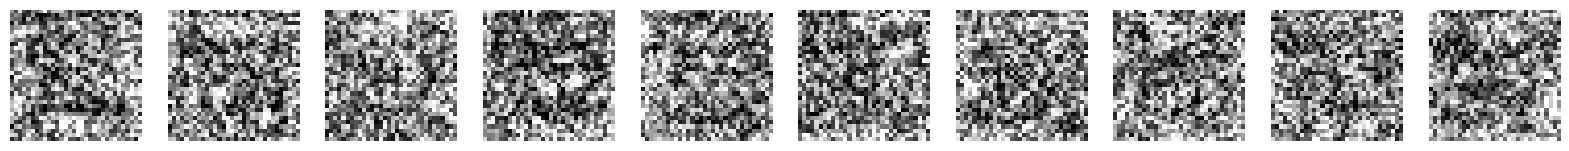

scores at step 3 : tensor([[-21.0944],
        [-21.2994],
        [-21.4175],
        [-21.1983],
        [-21.6742],
        [-21.6382],
        [-21.4018],
        [-21.4133],
        [-22.0441],
        [-20.9641]])


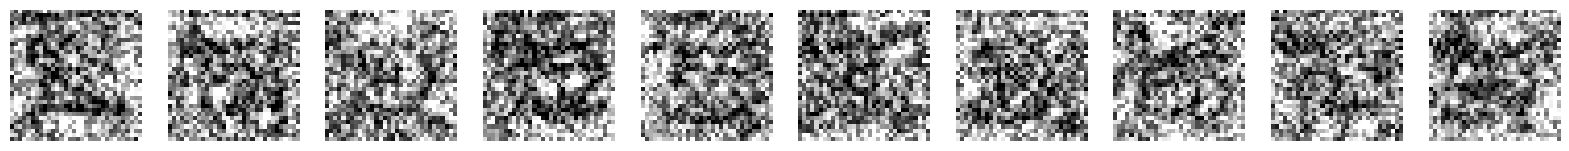

scores at step 4 : tensor([[-19.3377],
        [-19.7514],
        [-19.5804],
        [-19.7136],
        [-20.1646],
        [-20.3547],
        [-19.8600],
        [-19.6413],
        [-20.6264],
        [-18.8833]])


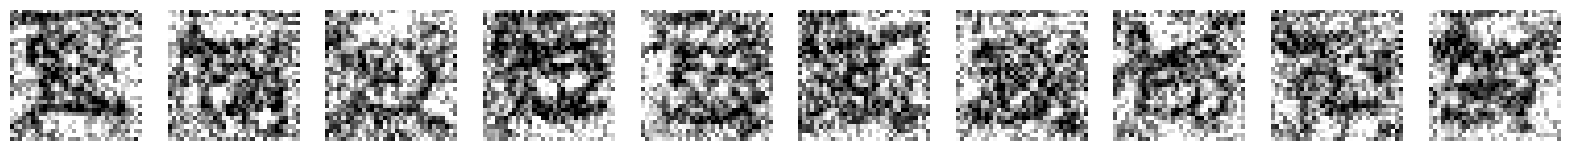

scores at step 5 : tensor([[-17.0388],
        [-17.9020],
        [-17.3357],
        [-18.0016],
        [-18.3504],
        [-18.9068],
        [-17.7161],
        [-17.4873],
        [-18.7256],
        [-16.2370]])


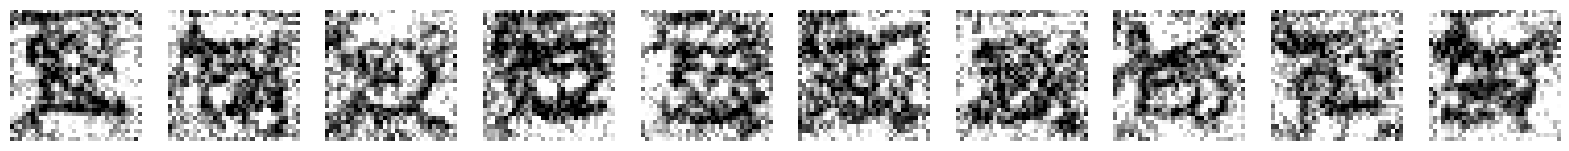

scores at step 6 : tensor([[-14.2707],
        [-15.8341],
        [-14.8604],
        [-16.2195],
        [-16.3119],
        [-17.3374],
        [-15.0706],
        [-14.9729],
        [-16.1901],
        [-13.3909]])


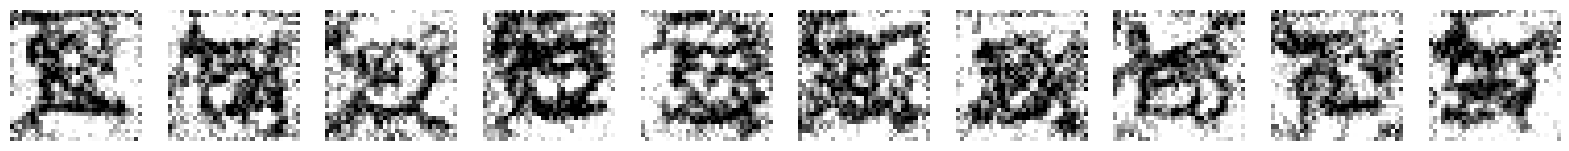

scores at step 7 : tensor([[-11.4302],
        [-13.4972],
        [-12.2698],
        [-14.4441],
        [-14.3130],
        [-15.7974],
        [-12.1299],
        [-12.4765],
        [-13.2131],
        [-10.8664]])


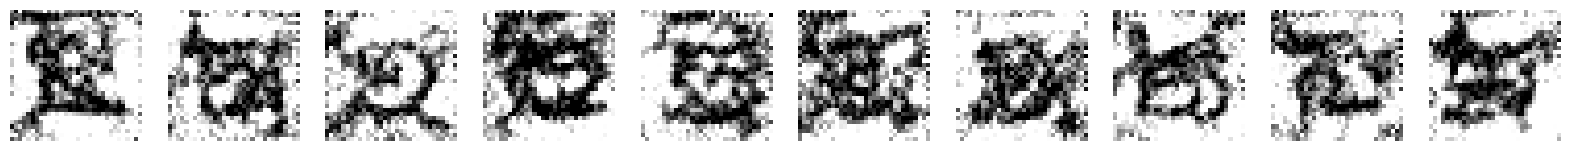

scores at step 8 : tensor([[ -9.1059],
        [-10.9778],
        [ -9.6007],
        [-12.7831],
        [-12.3719],
        [-14.4282],
        [ -9.6324],
        [ -9.9567],
        [-10.1684],
        [ -8.8691]])


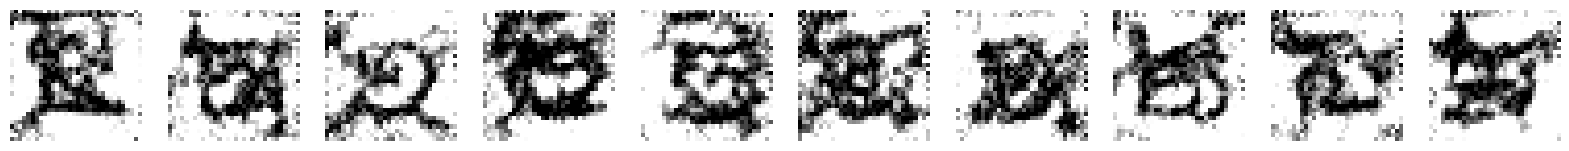

scores at step 9 : tensor([[ -7.4954],
        [ -8.6075],
        [ -7.2134],
        [-11.3094],
        [-10.5905],
        [-13.1603],
        [ -7.6884],
        [ -7.8803],
        [ -7.6890],
        [ -7.3709]])


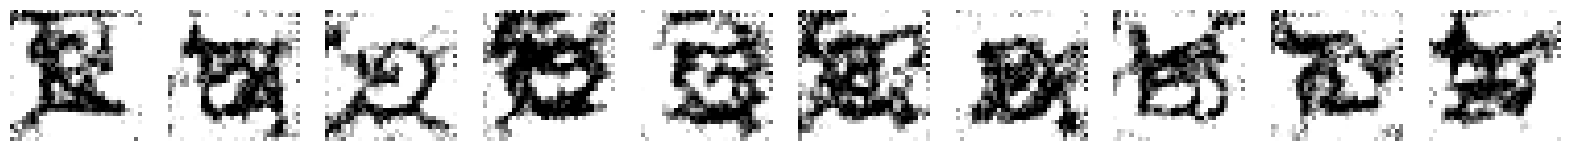

scores at step 10 : tensor([[ -6.3070],
        [ -6.4944],
        [ -5.2441],
        [-10.0559],
        [ -8.9302],
        [-11.9663],
        [ -6.3390],
        [ -6.3415],
        [ -5.8618],
        [ -6.1927]])


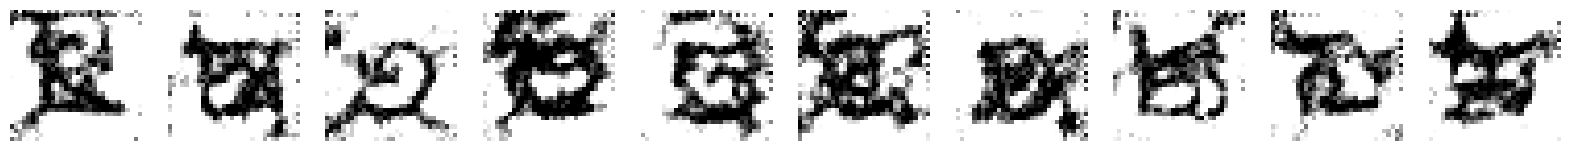

scores at step 11 : tensor([[ -5.4038],
        [ -4.9104],
        [ -3.7194],
        [ -9.0741],
        [ -7.4584],
        [-10.8267],
        [ -5.4220],
        [ -4.9665],
        [ -4.6200],
        [ -5.2044]])


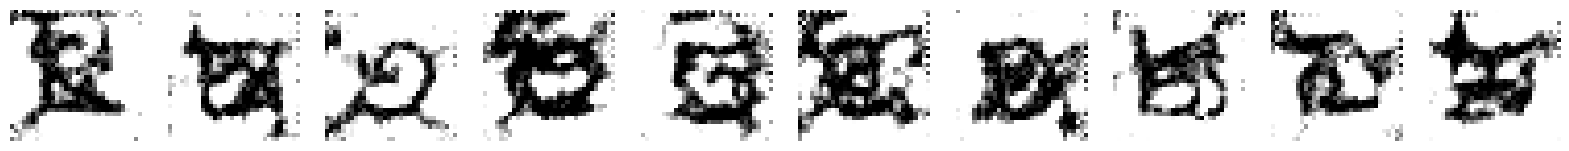

scores at step 12 : tensor([[-4.6596],
        [-3.8418],
        [-2.6459],
        [-8.2908],
        [-6.1379],
        [-9.7557],
        [-4.7393],
        [-3.9495],
        [-3.8268],
        [-4.5007]])


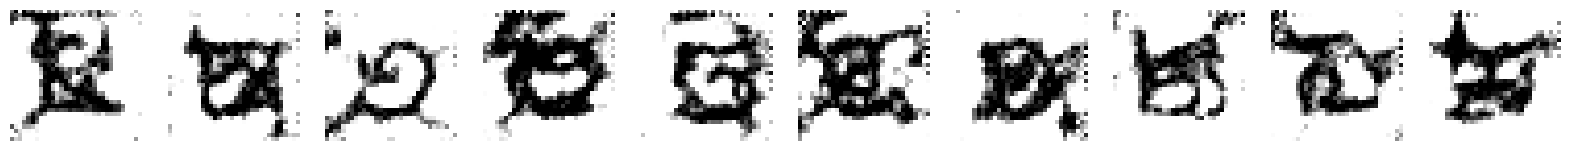

scores at step 13 : tensor([[-3.9887],
        [-3.1073],
        [-1.8603],
        [-7.5913],
        [-5.1010],
        [-8.8336],
        [-4.2150],
        [-3.1591],
        [-3.2654],
        [-3.9087]])


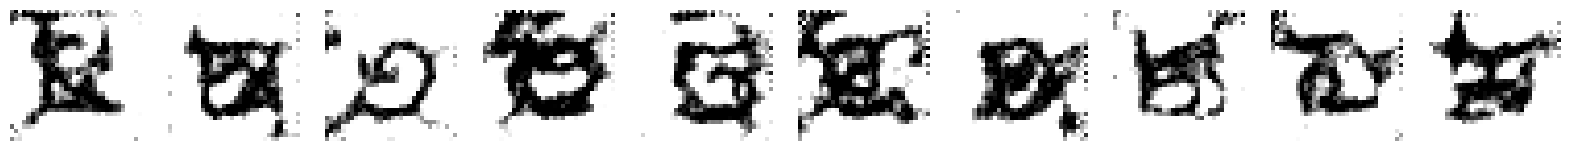

scores at step 14 : tensor([[-3.3928],
        [-2.6402],
        [-1.3770],
        [-6.9761],
        [-4.2533],
        [-8.0384],
        [-3.7787],
        [-2.5277],
        [-2.9194],
        [-3.4073]])


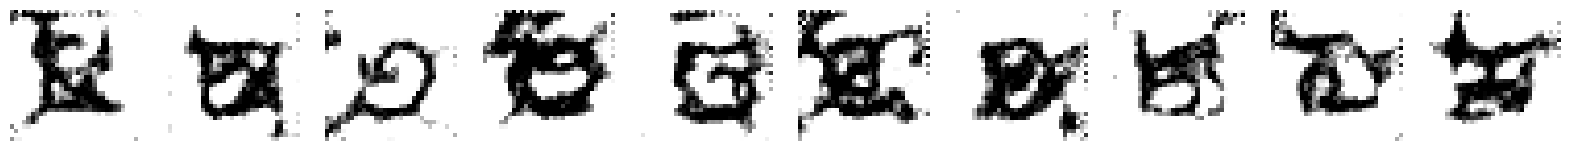

scores at step 15 : tensor([[-2.8802],
        [-2.2521],
        [-1.0957],
        [-6.4632],
        [-3.5927],
        [-7.3051],
        [-3.3698],
        [-1.9986],
        [-2.6346],
        [-2.9125]])


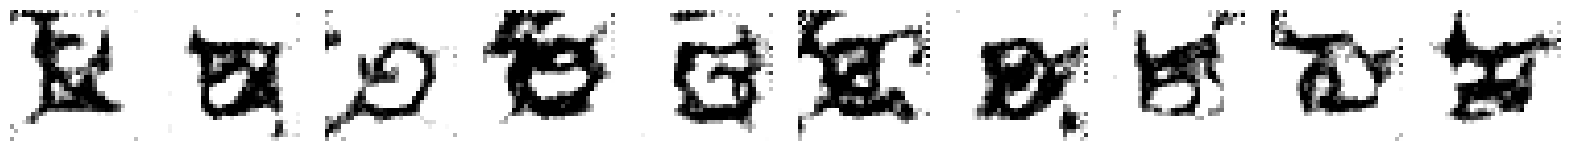

scores at step 16 : tensor([[-2.4651],
        [-1.9071],
        [-0.9138],
        [-5.9881],
        [-3.0414],
        [-6.6807],
        [-2.9427],
        [-1.5764],
        [-2.3974],
        [-2.4573]])


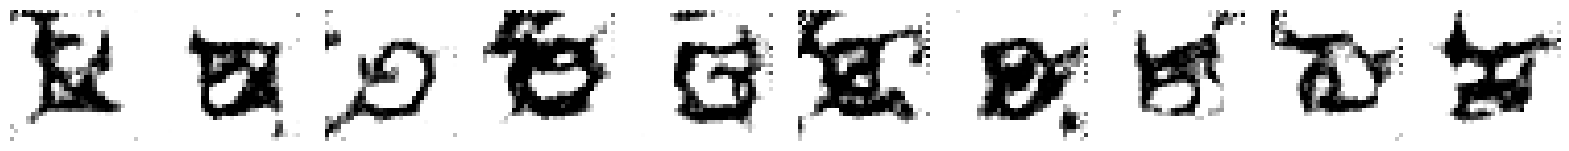

scores at step 17 : tensor([[-2.1234],
        [-1.6092],
        [-0.7875],
        [-5.4844],
        [-2.5514],
        [-6.1029],
        [-2.5650],
        [-1.2250],
        [-2.1802],
        [-2.0664]])


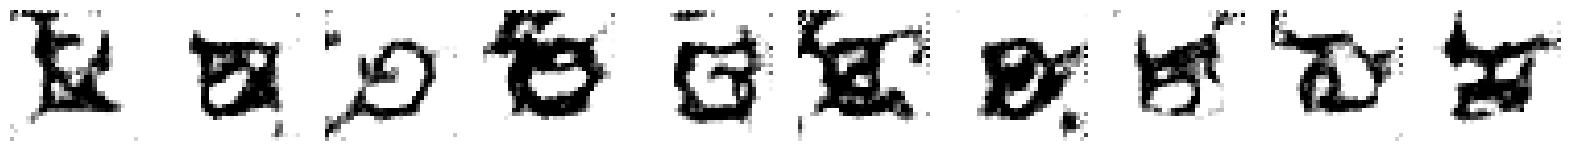

scores at step 18 : tensor([[-1.8252],
        [-1.3554],
        [-0.7231],
        [-4.9968],
        [-2.1328],
        [-5.5401],
        [-2.2473],
        [-0.9534],
        [-1.9826],
        [-1.7760]])


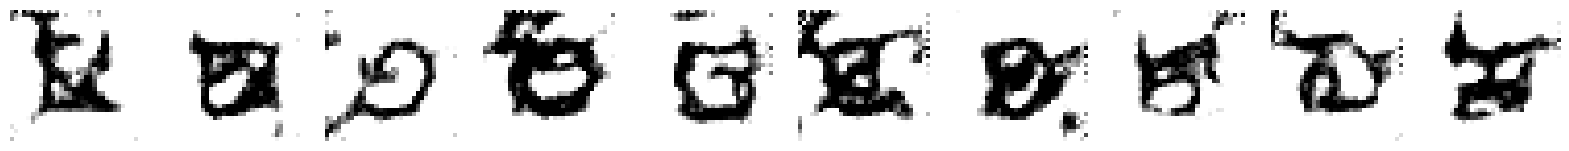

scores at step 19 : tensor([[-1.5784],
        [-1.1407],
        [-0.6603],
        [-4.5974],
        [-1.8036],
        [-5.0092],
        [-1.9530],
        [-0.7669],
        [-1.7984],
        [-1.5399]])


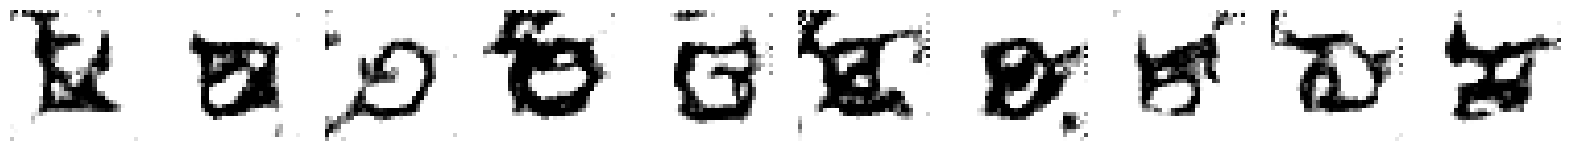

scores at step 20 : tensor([[-1.3655],
        [-0.9544],
        [-0.6000],
        [-4.2446],
        [-1.5623],
        [-4.5396],
        [-1.7079],
        [-0.6585],
        [-1.6211],
        [-1.3474]])


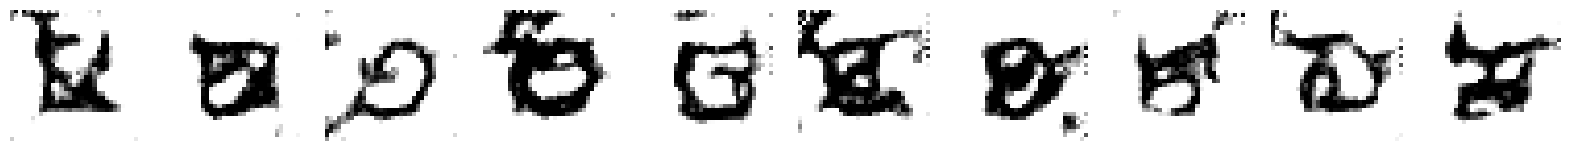

I will show last 20 rounds next
scores at step -20 : tensor([[-0.2893],
        [-0.3058],
        [-0.1501],
        [-0.9318],
        [-0.2848],
        [-0.9710],
        [-0.3409],
        [-0.1278],
        [-0.2340],
        [-0.3655]])


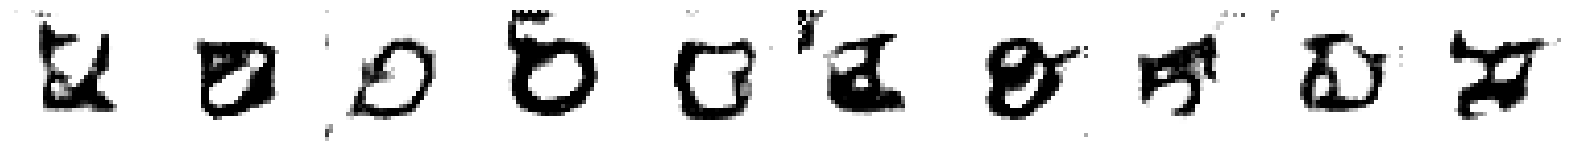

scores at step -19 : tensor([[-0.2691],
        [-0.2985],
        [-0.1463],
        [-0.8933],
        [-0.2755],
        [-0.8291],
        [-0.3335],
        [-0.1235],
        [-0.2268],
        [-0.3567]])


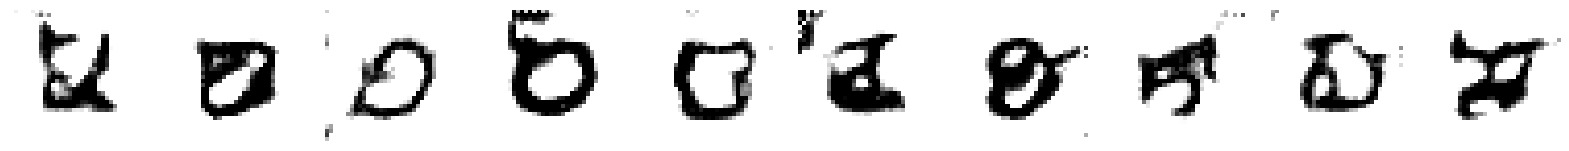

scores at step -18 : tensor([[-0.2534],
        [-0.2911],
        [-0.1430],
        [-0.8549],
        [-0.2685],
        [-0.7013],
        [-0.3264],
        [-0.1197],
        [-0.2194],
        [-0.3443]])


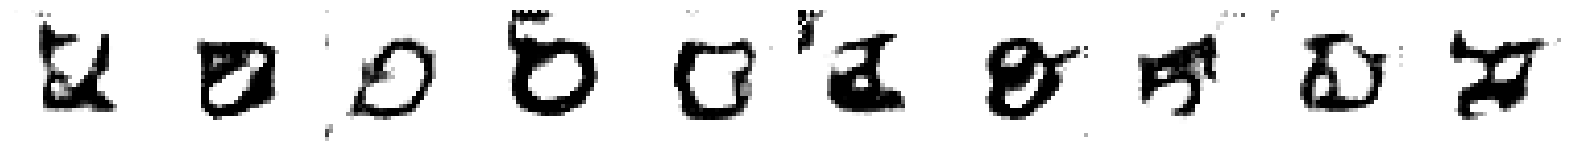

scores at step -17 : tensor([[-0.2397],
        [-0.2820],
        [-0.1401],
        [-0.8222],
        [-0.2614],
        [-0.5929],
        [-0.3208],
        [-0.1158],
        [-0.2136],
        [-0.3361]])


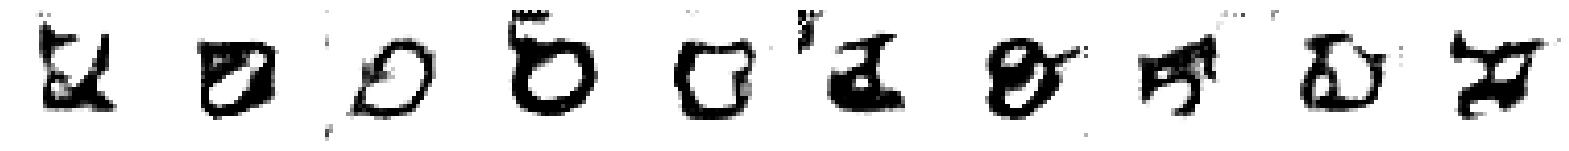

scores at step -16 : tensor([[-0.2270],
        [-0.2732],
        [-0.1365],
        [-0.7840],
        [-0.2549],
        [-0.5255],
        [-0.3146],
        [-0.1129],
        [-0.2090],
        [-0.3269]])


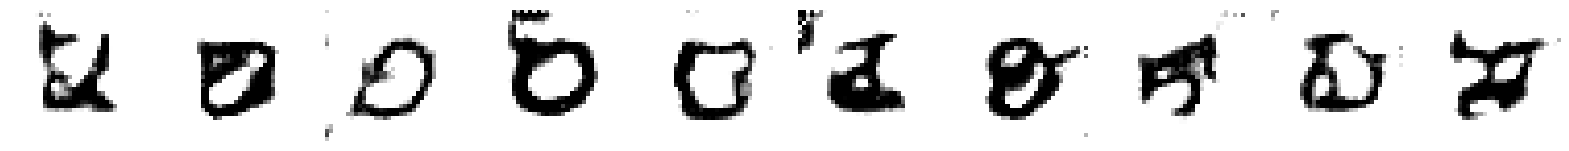

In [10]:
last_no_rounds=20
print(f"I will show first {last_no_rounds} rounds")
for i in range(last_no_rounds):
    generated_images = gen_images[i,:]
    scores = escores[i,:]
    print(f"scores at step {i+1} : {scores}")
    display(generated_images.squeeze(1).numpy())

print(f"I will show last {last_no_rounds} rounds next")
for i in range(5):
    generated_images = gen_images[-(last_no_rounds-i),:]
    scores = escores[-(last_no_rounds-i),:]
    print(f"scores at step {-(last_no_rounds-i)} : {scores}")
    display(generated_images.squeeze(1).numpy())